# Logistic Regression from Scratch with iris dataset

In [53]:
%matplotlib inline

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

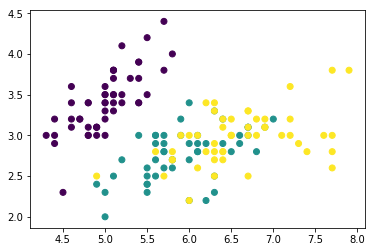

In [55]:
iris = datasets.load_iris()
X = iris.data[:,:2] #First two features of iris dataset
Y = iris.target
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

### Reduce dataset to 0 and 1

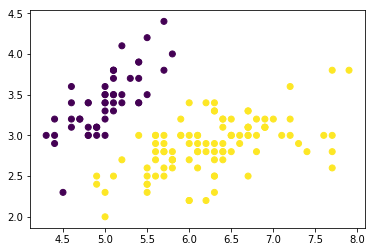

In [56]:
Y = (Y!=0) * 1
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

### Define logistic regression functions

In [57]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

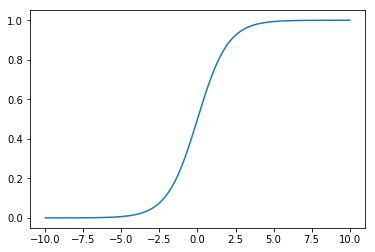

In [58]:
x_sigmoid = np.linspace(-10,10,1000)
y_sigmoid = sigmoid(x_sigmoid)
plt.plot(x_sigmoid,y_sigmoid)
plt.show()

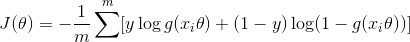

In [59]:
def J(Theta,X,Y):
    m = Y.size
    hx = sigmoid(np.dot(X,Theta))
    #m x 1 
    cost = -1 * np.sum(Y*np.log(hx) + (1-Y) * np.log(1-hx)) / m
    return cost
    

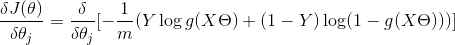
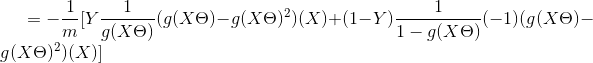
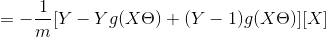
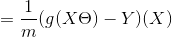

In [60]:
def gradient_descent(X,Y,starting_thetas = None,learning_rate=0.01,iterations=1000):
    costs = []
    m,num_features = X.shape[:2]
    ones = np.ones(m)[:,np.newaxis]
    X = np.concatenate((ones,X),axis=1)
    Y = np.array(Y)[:,np.newaxis]
    
    if starting_thetas is None:
        Theta = np.array([0] * (num_features + 1),np.float64)[:,np.newaxis]
    else:
        Theta = starting_thetas[:,np.newaxis]
    
    for i in range(iterations):
        #Shape X: m x n
        #Shape Theta: n x 1
        #Shape Y: m x 1
        hx = np.dot(X,Theta)
        gx = sigmoid(hx)
        gradient = 1/m * np.dot(X.T,gx-Y)
        cost = J(Theta,X,Y)
        Theta -= gradient*learning_rate
        costs.append(cost)
        
    return Theta,costs
        
    
    
    

In [61]:
thetas,costs = gradient_descent(X,Y,learning_rate=0.1,iterations=5000)
print("Thetas: {0}".format(thetas))

Thetas: [[-1.98337607]
 [ 4.93931869]
 [-7.93132824]]


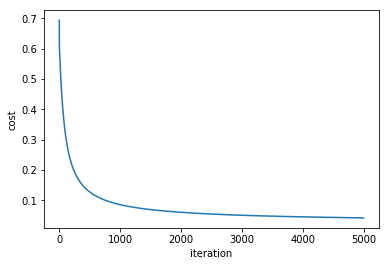

In [62]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

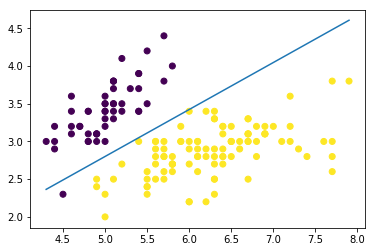

In [63]:
plt.scatter(X[:,0],X[:,1],c = Y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()

x1_boundary = np.linspace(x1_min,x1_max,1000)
x2_boundary = (0.5 - thetas[0] - thetas[1] * x1_boundary) / thetas[2]

plt.plot(x1_boundary,x2_boundary)

plt.show()